### Data Description

- 출처 : https://www.kaggle.com/competitions/heart-disease-prediction/data\n",
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 0 = normal, 1 = having a heart disease

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')
path = 'C:/Users/OWNER/Downloads/heart-disease-prediction/'
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
4,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
237,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
238,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
239,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [5]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,56,1,1,120,236,0,1,178,0,0.8,2,0,2
2,57,0,0,120,354,0,1,163,1,0.6,2,0,2
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1
4,49,1,1,130,266,0,1,171,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,1,0,146,218,0,1,105,0,2.0,1,1,3
58,52,1,0,128,204,1,1,156,1,1.0,1,0,0
59,46,1,0,140,311,0,1,120,1,1.8,1,2,3
60,63,0,0,124,197,0,1,136,1,0.0,1,0,2


In [6]:
# 데이터 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       241 non-null    int64  
 1   sex       241 non-null    int64  
 2   cp        241 non-null    int64  
 3   trestbps  241 non-null    int64  
 4   chol      241 non-null    int64  
 5   fbs       241 non-null    int64  
 6   restecg   241 non-null    int64  
 7   thalach   241 non-null    int64  
 8   exang     241 non-null    int64  
 9   oldpeak   241 non-null    float64
 10  slope     241 non-null    int64  
 11  ca        241 non-null    int64  
 12  thal      241 non-null    int64  
 13  target    241 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.5 KB


### EDA

<AxesSubplot:>

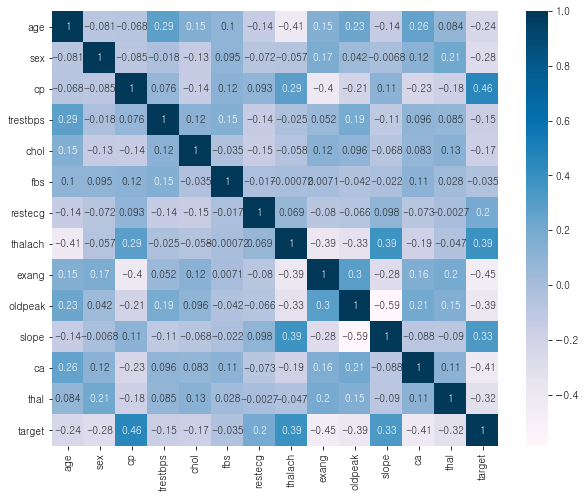

In [7]:
import matplotlib.cm
plt.figure(figsize = (10,8))
sns.heatmap(data = train.corr(), annot=True, cmap='PuBu')

- cp, exang, ca가 0.4를 넘는 상관계수
- age, sex, restrecg, thalach, oldepeak, slope는 어느정도의 상관성
- fbs와는 많이 약함

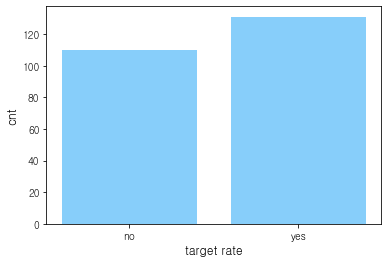

환자수 : 131, 비율 : 54.36%
정상수 : 110, 비율 : 45.64%


In [8]:
# 환자 비율 확인
colors=['tomato','lightskyblue']

nocnt = len(train[train['target']==0])
yescnt = len(train[train['target']==1])
total =  len(train['target'])

diseaseRate =  pd.Series({'no':nocnt, 'yes': yescnt})

plt.bar(diseaseRate.index,diseaseRate.values,color='lightskyblue')
plt.xlabel('target rate',fontsize=12)
plt.ylabel('cnt',fontsize=12)

plt.show()
print('환자수 : {}, 비율 : {}%'.format(yescnt, round(yescnt/total*100,2)))
print('정상수 : {}, 비율 : {}%'.format(nocnt, round(nocnt/total*100,2)))

In [9]:
# 연령대별 환자 확인
train_age = pd.DataFrame()
train_age['age_range'] = pd.cut(x = train['age']
                                ,bins = [0,10,20,30,40,50,60,100]
                                ,include_lowest = True, right = False
                                ,labels = ['10대 이하','10대','20대','30대','40대','50대','60대 이상'])

train_age = pd.concat([train_age['age_range'], train['target']], axis=1)

train_age

,age_range,target
0,30대,1
1,40대,1
2,50대,1
3,40대,1
4,50대,1
...,...,...
236,50대,0
237,50대,0
238,40대,0
239,60대 이상,0


<AxesSubplot:xlabel='age_range', ylabel='count'>

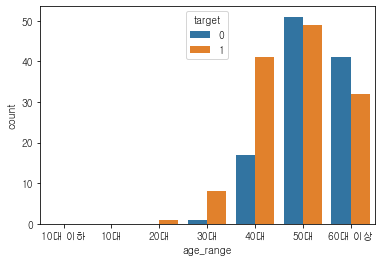

In [10]:
sns.countplot(data = train_age, x='age_range',hue='target')

<AxesSubplot:xlabel='sex', ylabel='count'>

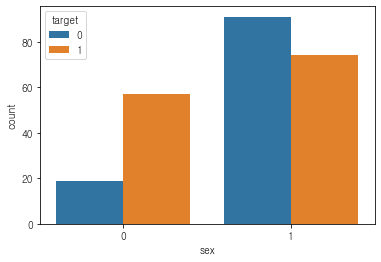

In [11]:
# 성별 확인 (0이 여성, 1이 남성)
sns.countplot(data = train, x='sex', hue='target')

- 여자가 남자보다 심장병 비율이 높다

<AxesSubplot:xlabel='cp', ylabel='count'>

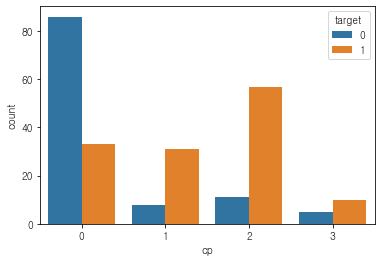

In [12]:
# cp 확인
sns.countplot(data=train, x='cp', hue='target')

- cp 지수는 협심증에 관한 타입으로 0이면 비교적 심장병 확률이 낮고 1, 2, 3은 비교적 높음

<AxesSubplot:xlabel='age_range', ylabel='thalach'>

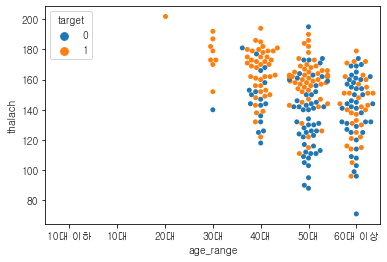

In [13]:
# thalach확인
train_thalach = pd.concat([train_age, train['thalach']], axis = 1)
sns.swarmplot(data = train_thalach, x='age_range', y='thalach',hue='target')

- 나이가 높아질수록 thalach가 점점 낮아지는걸 알 수 있음
- 같은 나이대에서는 심장병이 있으면 thalach가 높다.

<AxesSubplot:xlabel='exang', ylabel='count'>

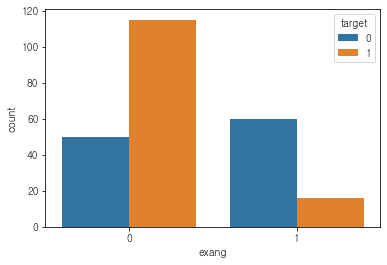

In [14]:
# exang 확인
sns.countplot(data=train, x='exang', hue='target')

- exang(exercise induced angina) 은 심장병 있을 확률이 비교적 낮다. 


<AxesSubplot:xlabel='target', ylabel='trestbps'>

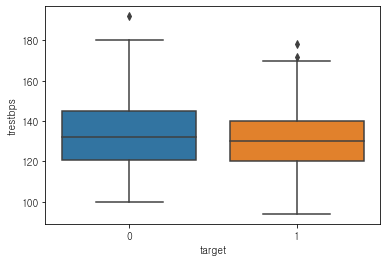

In [15]:
# trestbps확인
sns.boxplot(train['target'], train['trestbps'])

- 정상인의 trestbps가 더 높다

### 데이터 전처리

In [16]:
# 우선 카테고리형 변수를 get_dummies로 가공한다
cp_dum = pd.get_dummies(train['cp'], prefix='cp')
restecg_dum = pd.get_dummies(train['restecg'], prefix='restecg')
slope_dum = pd.get_dummies(train['slope'], prefix='slope')
thal_dum = pd.get_dummies(train['thal'], prefix='thal')

train2 =  train.drop(['cp','restecg','slope','thal'],axis=1)
train2  = pd.concat([train2 ,cp_dum,restecg_dum,slope_dum,thal_dum],axis=1)
train2 

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
1,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
2,56,0,140,294,0,153,0,1.3,0,1,...,1,0,0,0,1,0,0,0,1,0
3,44,1,120,263,0,173,0,0.0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,52,1,172,199,1,162,0,0.5,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,59,1,164,176,1,90,0,1.0,2,0,...,1,0,0,0,1,0,0,1,0,0
237,57,0,140,241,0,123,1,0.2,0,0,...,0,1,0,0,1,0,0,0,0,1
238,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
239,68,1,144,193,1,141,0,3.4,2,0,...,0,1,0,0,1,0,0,0,0,1


In [17]:
# test 데이터도 동시 가공
cp_dum_test = pd.get_dummies(test['cp'], prefix='cp')
restecg_dum_test = pd.get_dummies(test['restecg'], prefix='restecg')
slope_dum_test = pd.get_dummies(test['slope'], prefix='slope')
thal_dum_test = pd.get_dummies(test['thal'], prefix='thal')

test2 = test.drop(['cp','restecg','slope','thal'],axis=1)
test2  = pd.concat([test2 ,cp_dum_test,restecg_dum_test,slope_dum_test,thal_dum_test],axis=1)
test2

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,cp_3,restecg_0,restecg_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,1,0,1,0,0,0,1,0,0
1,56,1,120,236,0,178,0,0.8,0,0,...,0,0,1,0,0,1,0,0,1,0
2,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0
3,57,1,140,192,0,148,0,0.4,0,1,...,0,0,1,0,1,0,0,1,0,0
4,49,1,130,266,0,171,0,0.6,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,1,146,218,0,105,0,2.0,1,1,...,0,0,1,0,1,0,0,0,0,1
58,52,1,128,204,1,156,1,1.0,0,1,...,0,0,1,0,1,0,1,0,0,0
59,46,1,140,311,0,120,1,1.8,2,1,...,0,0,1,0,1,0,0,0,0,1
60,63,0,124,197,0,136,1,0.0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [18]:
# test, train 데이터 정리
label =  train2['target']
data =  train2.drop('target',axis=1)
data.shape

(241, 23)

In [19]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(data)
data =  standardScaler.transform(data)

In [20]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(data,label,test_size = 0.2, random_state=3)
train_X.shape

(192, 23)

### 모델링

- 모델의 성능은 GridsearchCV로 설정할 예정이고 해당 파라미터 값은 해당 출처에서 가져옴
- https://velog.io/@hyunicecream/GridSearchCV%EB%9E%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%A0%EA%B9%8C

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier()
lgb = LGBMClassifier()
gbm = GradientBoostingClassifier()
cat = CatBoostClassifier()
lreg = LogisticRegression()
rf = RandomForestClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV
# XGB
param_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300,500,1000]
              }    
# LGB                        
param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [25, 50, 75],
             "num_leaves" : [100,300,500,900,1200],
             "n_estimators" : [100, 200, 300,500,800,1000],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5]
              }
# GBM              
param_gbm = {"max_depth" : [4,5,6,7,8,9,10],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "n_estimators" : [100,200,300,500]
              }
# CAT
param_cat = {"depth" : [6,4,5,7,8,9,10],
          "iterations" : [250,100,500,1000],
          "learning_rate" : [0.001,0.01,0.1,0.2,0.3], 
          "l2_leaf_reg" : [2,5,10,20,30],
          "border_count" : [254]
          }

# Logistic
param_lreg = { 'C' : [1.0, 3, 5, 7, 10],
              'max_iter': [50, 200, 100, 300, 500,700, 800]
              }

# RandomForest
param_rf={
        'n_estimators':[100,300,500],
        'max_leaf_nodes':[10,12,14,16]
}

In [28]:
# verbose는 수행 결과 메시지 출력 0은 안함, 1은 간단, 2는 파라미터별
gscv_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_gbm = GridSearchCV (estimator = gbm, param_grid = param_gbm, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_cat = GridSearchCV (estimator = cat, param_grid = param_cat, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_lreg = GridSearchCV (estimator = lreg, param_grid = param_lreg, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_rf = GridSearchCV(estimator=rf,param_grid=param_rf,cv=2)
gscv_xgb.fit(train_X, train_y)
gscv_lgb.fit(train_X, train_y)
gscv_gbm.fit(train_X, train_y)
gscv_cat.fit(train_X, train_y)
gscv_lreg.fit(train_X, train_y)
gscv_rf.fit(train_X, train_y)

완료

- 이부분은 다음과 같이 계속 메모리 부족이 뜨기 때문에 완료로 바꿔놓음!
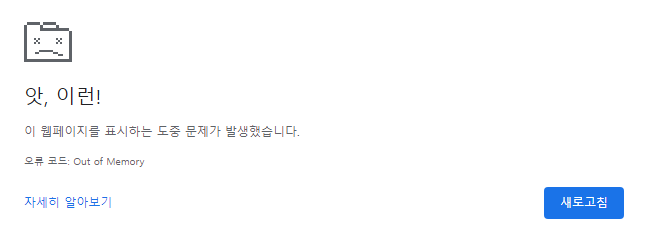

In [29]:
print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))
print("="*30)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
print("="*30)
print('GBM 파라미터: ', gscv_gbm.best_params_)
print('GBM 예측 정확도: {:.4f}'.format(gscv_gbm.best_score_))
print("="*30)
print('CAT 파라미터: ', gscv_cat.best_params_)
print('CAT 예측 정확도: {:.4f}'.format(gscv_cat.best_score_))
print("="*30)
print('Lreg 파라미터: ', gscv_lreg.best_params_)
print('Lreg 예측 정확도: {:.4f}'.format(gscv_lreg.best_score_))
print("="*30)
print('랜덤포레스트 파라미터: ', gscv_rf.best_params_)
print('랜덤포레스트 예측 정확도: {:.4f}'.format(gscv_rf.best_score_))
print("="*30)

XGB 파라미터:  {'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 200}
XGB 예측 정확도: 0.8490
LGB 파라미터:  {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 500, 'num_leaves': 100}
LGB 예측 정확도: 0.8385
GBM 파라미터:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
GBM 예측 정확도: 0.8125
CAT 파라미터:  {'border_count': 254, 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.001}
CAT 예측 정확도: 0.8646
Lreg 파라미터:  {'C': 1.0, 'max_iter': 50}
Lreg 예측 정확도: 0.7865
랜덤포레스트 파라미터:  {'max_leaf_nodes': 10, 'n_estimators': 300}
랜덤포레스트 예측 정확도: 0.8490


In [ ]:
# 하려다가 메모리 부족으로... 실패
from sklearn.ensemble import VotingClassifier
estimators=[
        ('gscv_xgb',gscv_xgb),
        ('gscv_lgb',gscv_lgb),
        ('gscv_gbm',gscv_gbm),
        ('gscv_cat',gscv_cat),
        ('gscv_lreg',gscv_lreg)]


voting =  VotingClassifier(estimators =  estimators, voting =  'soft')
voting.fit(train_X, train_y)

voting.score(train_X,train_y)

voting.score(test_X,test_y)

pred_voting =  voting.predict(test_X)
from sklearn.metrics import f1_score
f1_score(test_y,pred_voting)